# Endangered Birds and Fish Lab Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Questions which we want to answer:
##### - How has the population of endangered birds and fish has evolved over time and what are the current numbers in different regions?
##### -

Let's start with Question number one.

### Question 1: How has the population of endangered birds and fish has evolved over time and what are the current numbers in different regions?

As our question is about birds and fish, we start by looking at how the numbers of vulnerable, endangered and critically endangered birds and fish developed over time. The dataset is from the IUCN Red list of threatened species website. IUCN stands for International Union of Conservation. Some years like 2005 are missing in this dataset, but the reason for that is not mentioned on the website. (https://www.iucnredlist.org/resources/summary-statistics) CR stands for Critically Endangered, ER for Endangered and VU for Vulnerable.

In [2]:
df_history = pd.read_csv("data/IUCN_table_2.csv", sep=';')
df_history.set_index('Year')

,Birds_CR,Fishes_CR,Birds_ER,Fishes_ER,Birds_VU,Fishes_VU
Year,,,,,,
1998,168,157,235,134,704,443
2000,182,156,321,144,680,452
2002,182,157,326,143,684,442
2003,182,162,331,144,681,444
2004,179,171,345,160,688,470
2006,181,253,351,237,674,681
2007,189,254,356,254,672,693
2008,190,289,361,269,671,717
2009,192,306,362,298,669,810


In [3]:
df_history_birds = df_history[["Year", "Birds_CR", "Birds_ER", "Birds_VU"]].set_index('Year')
df_history_fish = df_history[["Year", "Fishes_CR", "Fishes_ER", "Fishes_VU"]].set_index('Year')

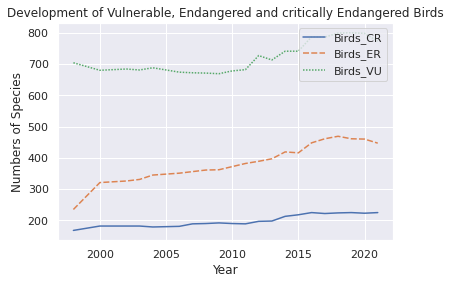

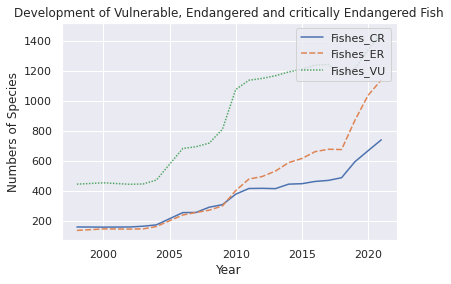

In [4]:
sns.lineplot(data=df_history_birds).set(title="Development of Vulnerable, Endangered and critically Endangered Birds")
plt.xlabel("Year")
plt.ylabel("Numbers of Species")
plt.legend(loc="upper right")
plt.show()

sns.lineplot(data=df_history_fish).set(title="Development of Vulnerable, Endangered and critically Endangered Fish")
plt.xlabel("Year")
plt.ylabel("Numbers of Species")
plt.legend(loc="upper right")
plt.show()

Now let's take a closer look at the current numbers of endangered birds and fish. We have already seen how the numbers have evolved over time, regarding worldwide numbers. In this step we want to have a look at the relative numbers from the OECD and what the percentages of all birds an fish are endangered. The dataset for this task is from the OECD website https://stats.oecd.org/Index.aspx?DataSetCode=WILD_LIFE

In [5]:
df = pd.read_csv("data/WILD_LIFE.csv")

In [6]:
df

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,380.000,NaN,NaN
1,TOT_KNOWN_IND,Total number of indigenous known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,353.000,NaN,NaN
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,38.000,NaN,NaN
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,10.000,NaN,NaN
4,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,59.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,CRITICAL_IND,Number of critically endangered indigenous spe...,LICHEN,Lichens,CHL,Chile,NBR,Number,0,Units,NaN,NaN,1.000,NaN,NaN
3460,VULNERABLE_IND,Number of vulnerable indigenous species,LICHEN,Lichens,CHL,Chile,NBR,Number,0,Units,NaN,NaN,1.000,NaN,NaN
3461,THREATENED_IND,Total number of indigenous threatened species,LICHEN,Lichens,CHL,Chile,NBR,Number,0,Units,NaN,NaN,2.000,NaN,NaN
3462,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,CRI,Costa Rica,NBR,Number,0,Units,NaN,NaN,1.000,NaN,NaN


At first we take a look at which species are contained in this dataset and what IUCN Categories are included. Afterwards we can concentrate on Birds and Fish.

In [11]:
df["Species"].unique()

array(['Mammals', 'Birds', 'Reptiles', 'Amphibians', 'Vascular plants',
       'Fish', 'Marine Fish', 'Freshwater Fish', 'Mosses', 'Lichens',
       'Invertebrates'], dtype=object)

In [12]:
df["IUCN"].unique()

array(['TOT_KNOWN', 'TOT_KNOWN_IND', 'ENDANGERED', 'CRITICAL',
       'VULNERABLE', 'THREATENED', 'ENDANGERED_IND', 'CRITICAL_IND',
       'VULNERABLE_IND', 'THREAT_PERCENT', 'THREATENED_IND',
       'IND_PERCENT'], dtype=object)

In [13]:
df["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'Chile', 'Estonia', 'Israel', 'Russia',
       'Slovenia', 'Luxembourg', 'Colombia', 'Latvia', 'Brazil',
       'Costa Rica', 'Lithuania'], dtype=object)

##### So let's begin by having a look at birds. (just the total numbers and not just the brids which are indigenous)

In [69]:
df_birds_current = df[(df.Species == 'Birds')][['IUCN', 'Species', 'Country', 'Value']]

df_birds = df_birds_current.pivot_table(values='Value', index='Country', columns='IUCN', aggfunc='sum')
df_birds['REST'] = df_birds['TOT_KNOWN'] - df_birds['CRITICAL'] - df_birds['ENDANGERED']  - df_birds['VULNERABLE'] - df_birds['THREATENED']

df_birds = df_birds[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_birds

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
Country,,,,,,
Australia,17.0,55.0,63.0,135.0,529.0,799.0
Austria,14.0,24.0,28.0,66.0,81.0,213.0
Belgium,20.0,15.0,20.0,55.0,88.0,198.0
Canada,26.0,14.0,48.0,88.0,498.0,674.0
Chile,2.0,25.0,19.0,46.0,418.0,510.0
Colombia,16.0,40.0,80.0,136.0,1682.0,1954.0
Costa Rica,2.0,8.0,20.0,30.0,828.0,888.0
Czech Republic,35.0,35.0,45.0,115.0,7.0,237.0
Denmark,24.0,15.0,45.0,84.0,73.0,241.0


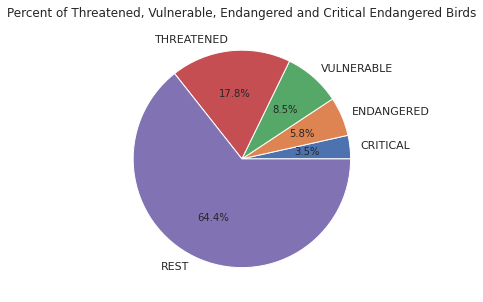

In [85]:
plt.rcParams["figure.figsize"] = (15,5)
df_birds[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST']].sum().plot.pie(autopct="%.1f%%", title="Percent of Threatened, Vulnerable, Endangered and Critical Endangered Birds")
plt.ylabel(None)
plt.show()

In [80]:
df_birds_percentages = df_birds
df_birds_percentages['CRITICAL_PCT'] = df_birds_percentages['CRITICAL']/df_birds_percentages['TOT_KNOWN']
df_birds_percentages['ENDANGERED_PCT'] = df_birds_percentages['ENDANGERED']/df_birds_percentages['TOT_KNOWN']
df_birds_percentages['VULNERABLE_PCT'] = df_birds_percentages['VULNERABLE']/df_birds_percentages['TOT_KNOWN']
df_birds_percentages['THREATENED_PCT'] = df_birds_percentages['THREATENED']/df_birds_percentages['TOT_KNOWN']
df_birds_percentages['REST_PCT'] = df_birds_percentages['REST']/df_birds_percentages['TOT_KNOWN']
df_birds_percentages = df_birds_percentages[['CRITICAL_PCT', 'ENDANGERED_PCT', 'VULNERABLE_PCT', 'THREATENED_PCT', 'REST_PCT']]

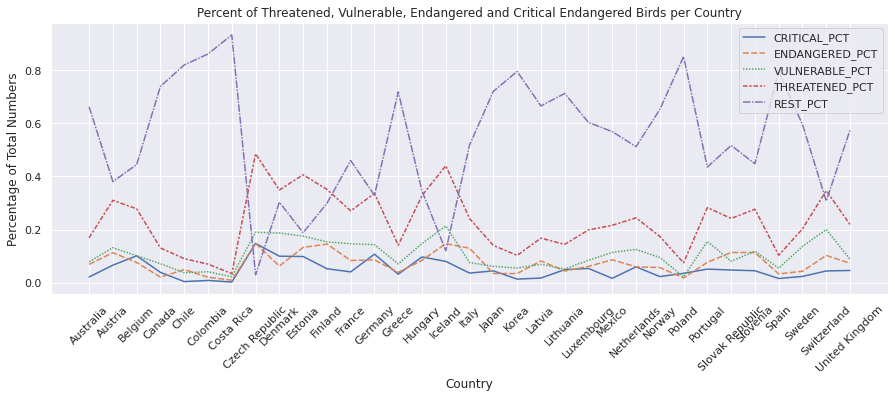

In [82]:
plt.rcParams["figure.figsize"] = (15,5)
sns.lineplot(data=df_birds_percentages).set(title="Percent of Threatened, Vulnerable, Endangered and Critical Endangered Birds per Country")
plt.xlabel("Country")
plt.ylabel("Percentage of Total Numbers")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()

##### Now let's continue by having a look at fish. (just the total numbers and not just the brids which are indigenous)

In [83]:
# fish are divided in 'Fish', 'Marine Fish', 'Freshwater Fish'

df_fish_current = df[(df.Species == 'Fish') | (df.Species == 'Marine Fish') | (df.Species == 'Freshwater Fish')][['IUCN', 'Species', 'Country', 'Value']]

df_fish = df_birds_current.pivot_table(values='Value', index='Country', columns='IUCN', aggfunc='sum')
df_fish['REST'] = df_birds['TOT_KNOWN'] - df_birds['CRITICAL'] - df_birds['ENDANGERED']  - df_birds['VULNERABLE'] - df_birds['THREATENED']

df_fish = df_birds[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_fish

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
Country,,,,,,
Australia,17.0,55.0,63.0,135.0,529.0,799.0
Austria,14.0,24.0,28.0,66.0,81.0,213.0
Belgium,20.0,15.0,20.0,55.0,88.0,198.0
Canada,26.0,14.0,48.0,88.0,498.0,674.0
Chile,2.0,25.0,19.0,46.0,418.0,510.0
Colombia,16.0,40.0,80.0,136.0,1682.0,1954.0
Costa Rica,2.0,8.0,20.0,30.0,828.0,888.0
Czech Republic,35.0,35.0,45.0,115.0,7.0,237.0
Denmark,24.0,15.0,45.0,84.0,73.0,241.0


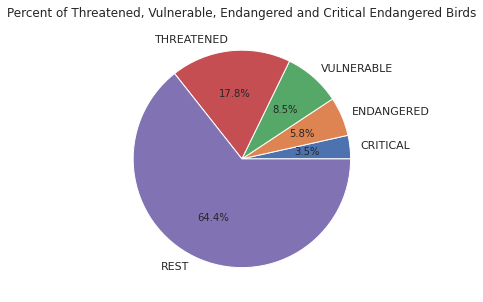

In [84]:
df_fish[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST']].sum().plot.pie(autopct="%.1f%%", title="Percent of Threatened, Vulnerable, Endangered and Critical Endangered Birds")
plt.ylabel(None)
plt.show()

In [86]:
df_fish_percentages = df_fish
df_fish_percentages['CRITICAL_PCT'] = df_fish_percentages['CRITICAL']/df_fish_percentages['TOT_KNOWN']
df_fish_percentages['ENDANGERED_PCT'] = df_fish_percentages['ENDANGERED']/df_fish_percentages['TOT_KNOWN']
df_fish_percentages['VULNERABLE_PCT'] = df_fish_percentages['VULNERABLE']/df_fish_percentages['TOT_KNOWN']
df_fish_percentages['THREATENED_PCT'] = df_fish_percentages['THREATENED']/df_fish_percentages['TOT_KNOWN']
df_fish_percentages['REST_PCT'] = df_fish_percentages['REST']/df_fish_percentages['TOT_KNOWN']
df_fish_percentages = df_fish_percentages[['CRITICAL_PCT', 'ENDANGERED_PCT', 'VULNERABLE_PCT', 'THREATENED_PCT', 'REST_PCT']]

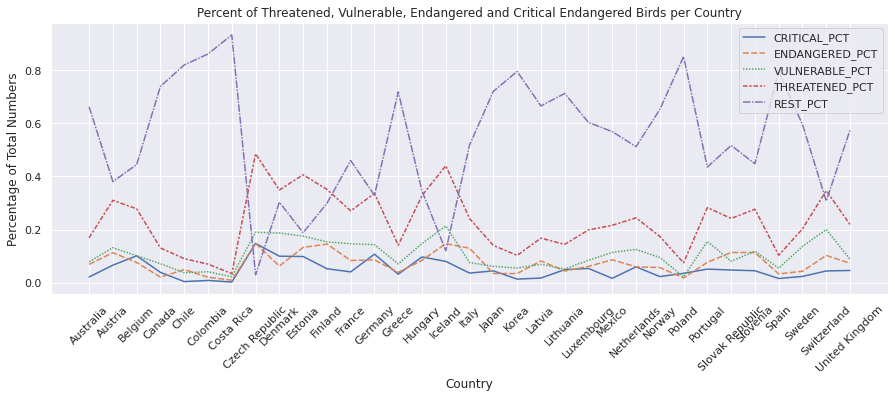

In [87]:
plt.rcParams["figure.figsize"] = (15,5)
sns.lineplot(data=df_fish_percentages).set(title="Percent of Threatened, Vulnerable, Endangered and Critical Endangered Birds per Country")
plt.xlabel("Country")
plt.ylabel("Percentage of Total Numbers")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()